In [ ]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리 설정
import os
os.chdir('/content/drive/MyDrive/PyStat')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 객체 내용/타입 출력
def printobj(*a):
    for x in a:
        display(x)
        print('\n', type(x), '\n')

# 추론 통계

<details><summary>추론 통계(inferential statistics) : 수집한 데이터를 바탕으로 추론, 예측하는 통계 기법
</summary>

- 모집단/표본
- 확률변수
- 확률분포
- 표본분포
- 추정/검정

## CHAP 7. 연속형 확률변수

- 연속형 확률변수

- 7장

- 8장

- 확률변수가 취할 수 있는 값의 차이

- 적분 계산 과정

- 5장과 동일한 방법

- 본질적인 차이 無

- 라이브러리 임포트

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 소수점 이하 3자리까지 출력
%precision 3
np.set_printoptions(precision=3, suppress=True)

# 그래프가 Jupyter Notebook 위에 표시되도록 설정
%matplotlib inline

- SciPy의 integrate 모듈

In [ ]:
from scipy import integrate

### 7-1. 1차원 연속형 확률변수

- 1차원 연속형 확률변수

- 불공정한 룰렛

- 0.5일 확률

- 구간의 확률

#### 1) 1차원 연속형 확률변수의 정의

##### <u>확률밀도함수</u>

- 이산형 확률변수
  - 값의 (이산적인) 집합
  - 확률함수

- 연속형 확률변수
  - 값의 (연속적인) 구간
  - **확률밀도함수**

- 밀도함수 $f(x) \ne P(X=x)$

- $P(x_0 ≤ X ≤ x_1)$로 정의되고

- 적분으로 계산

$$
P(x_0 ≤ X ≤ x_1) = \int_{x_0}^{x_1}{f(x)\,dx}
\tag{7-1}
$$

- 둘러싸인 영역의 면적

- 그림 7-1

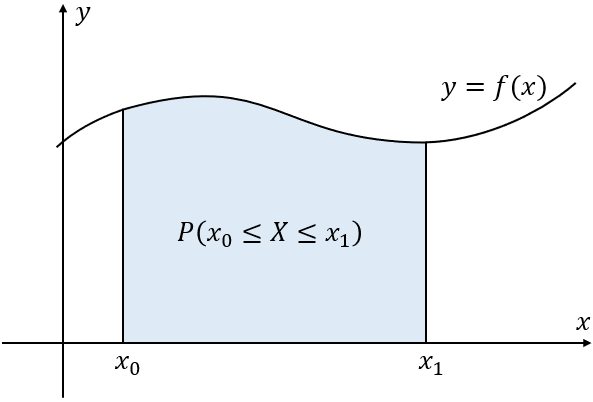

[그림 7-1] 밀도함수로 정의되는 확률

- 번거로운 계산 SciPy 수행

- 불공정할 룰렛 예


- 취할 수 있는 값의 구간
  - x_range로 정의

In [ ]:
x_range = np.array([0, 1])

- 밀도함수

- 불공정한 룰렛

$$
f(x) =
\begin{cases}
2x & (0 ≤ x ≤ 1) \\\\
0 & (otherwise)
\end{cases}
\tag{7-2}
$$

- 2 곱하는 것

In [ ]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

- x_range와 f의 세트가 확률분포
  - 확률변수 $X$ 움직임 결정

- 본래의 정의

- $X ∼ [\;\text{x_range},\;f\;]$

In [ ]:
X = [x_range, f]

- x_range, f 자체로

- 밀도함수 $f(x)$ 시각화

- 영역에 색 적용

- 0.4 \~ 0.6 사이 값을 취할 확률

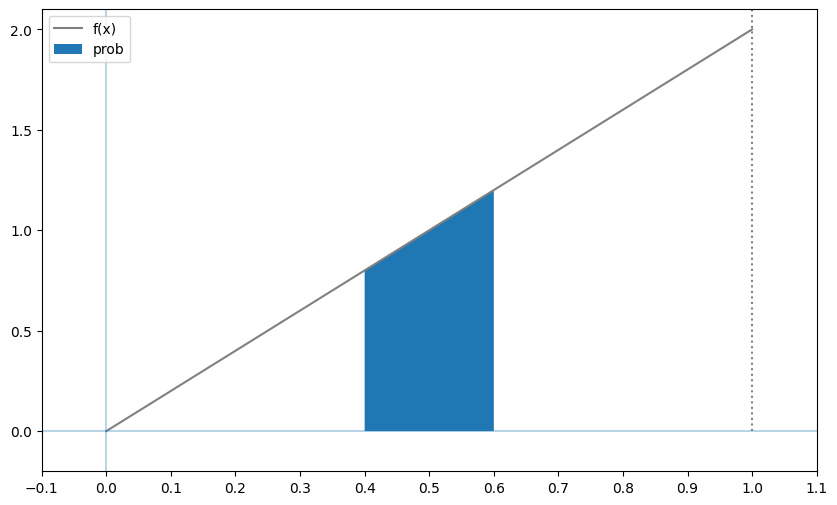

[그림 7-2] 불공정한 룰렛에 대한 밀도함수와 확률


In [ ]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()
print('[그림 7-2] 불공정한 룰렛에 대한 밀도함수와 확률')

- 둘러싸인 영역의 면적 계산

- 확률의 정의에 대한 식

$$
P(0.4 ≤ X ≤ 0.6) = \int_{0.4}^{0.6}{2x\,dx}
$$

- integrate의 quad() 함수

- 적분값과 추정오차 반환

In [ ]:
# 첫 번째 인자는 피적분함수, 두 번째 인수와 세번째 인수는 적분 구간
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

- 첫 번째 반환 값 $=0.2$

> **확률의 성질**

> 연속형 확률변수에서는 확률의 성질로 다음 두 식을 만족해야 한다.<br><br>
>
> $$
\begin{align}
f(x) & ≥ 0 \\\\
\int_{-∞}^{∞}{f(x)\,dx} & = 1 \\
\end{align}
\tag{7-3}
$$


- 첫 번째 성질 : 그림 7-2

- 값으로 확인
  - scipy.optimize 모듈의 minimize_scalar() 함수

In [ ]:
from scipy.optimize import minimize_scalar
result = minimize_scalar(f)
printobj(result)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0
       x: -1.6180339754913822
     nit: 37
    nfev: 40


 <class 'scipy.optimize._optimize.OptimizeResult'> 



- 'fun'이 최소값

- 바로 'fun'만 계산

In [ ]:
minimize_scalar(f).fun

0

- 첫 번째 성질 만족

- 두 번째 성질 : 그림 7-2

- 삼각형 면적 $=1$

- 적분 계산 (무한대 $= \text{np.inf}$)

In [ ]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

- 두 번째 성질도 만족

- $2x$의 이유

##### <u>누적분포함수</u>

- **누적분포함수**(cumulative distribution function, CDF)

- 분포함수의 정의

$$
F(x) = P(X ≤ x) = \int_{-∞}^{x}{f(x)\,dx}
\tag{7-4}
$$

- 정의대로 구현

In [ ]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

- 분포함수로 확률 계산

- 0.4 \~ 0.6 사이 값을 취할 확률

$$
P(0.4 ≤ X ≤ 0.6) = F(0.6) - F(0.4)
$$

In [ ]:
F(0.6) - F(0.4)

0.200

- 분포함수 $F(x)$ 시각화
  - 반드시 단조증가함수

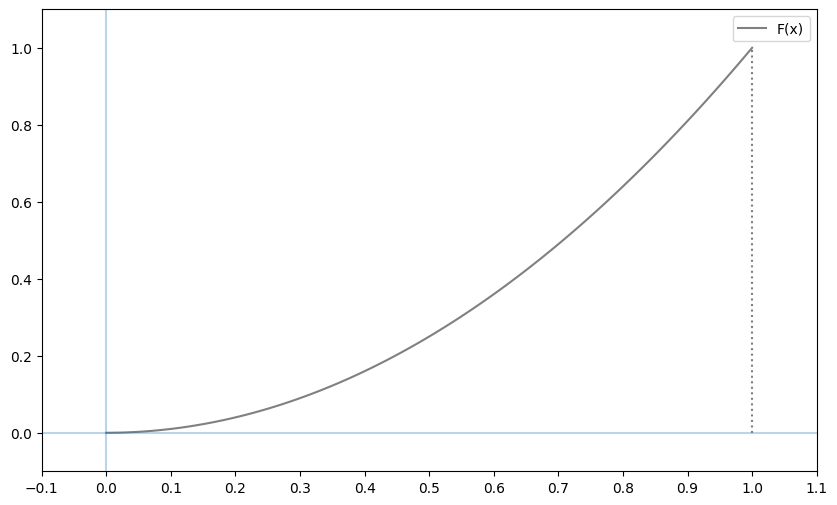

[그림 7-3] 불공정한 룰렛에 대한 분포함수


In [ ]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()
print('[그림 7-3] 불공정한 룰렛에 대한 분포함수')

##### <u>확률변수의 변환</u>

- 5장과 동일
  - $ Y=2X+3$

- $Y$도 연속형 확률변수

- $Y$ 대신 $(2X+3)$ 사용

- 변환된 $Y$의 밀도함수 $f^*(y)$

- 정의역 $(0 ≤ x ≤ 1)$ &nbsp;/&nbsp; 함수 $2x$

- 정의역 $(3 ≤ y ≤ 5)$ &nbsp;/&nbsp; 함수 $y-3$

  - $k\,(y-3)$라 하고
    - 확률의 두 번째 성질로 $k$ 결정

$$
f^*(y) =
\begin{cases}
\cfrac{(y-3)}{2} & (3 ≤ y ≤ 5) \\\\
0 & (otherwise)
\end{cases}
\tag{7-5}
$$

- 분포함수 $F^*(y)$

$$
F^*(y) = P(Y ≤ y) = \int_{-∞}^{y}{f^*(y)\,dy}
\tag{7-6}
$$

In [ ]:
y_range = [3, 5]

def f_star(y):
    if y_range[0] <= y <= y_range[1]:
         return (y - 3) / 2
    else:
        return 0

def F_star(y):
    return integrate.quad(f_star, -np.inf, y)[0]

- $f^*(y)$ 및 $F^*(y)$ 동시에 시각화

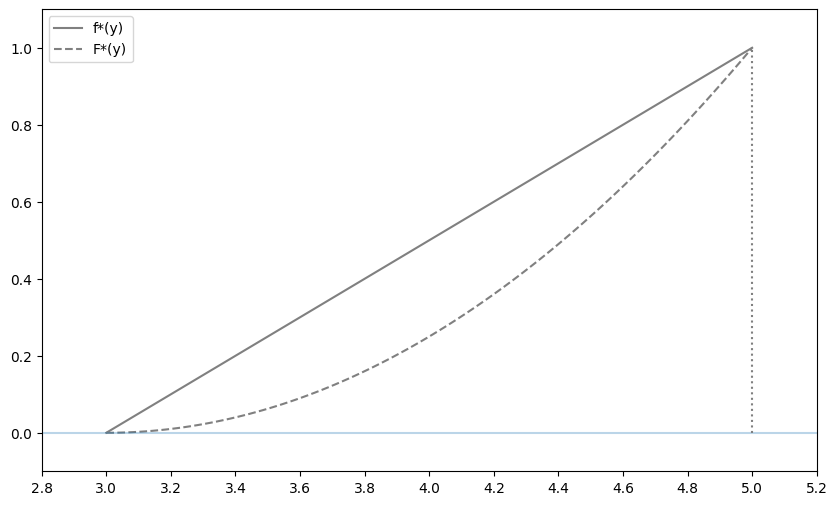

[그림 7-4] 불공정한 룰렛을 변환한 밀도함수와 분포함수


In [ ]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [f_star(y) for y in ys],
        label='f*(y)', color='gray')
ax.plot(ys, [F_star(y) for y in ys],
        label='F*(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()
print('[그림 7-4] 불공정한 룰렛을 변환한 밀도함수와 분포함수')

- 변환전 $X$의 경우와 유사

#### 2) 1차원 연속형 확률변수의 지표

- 평균·분산
  - $Σ → ∫$

##### <u>기대값</u>

- $X$의 평균 $=X$의 기대값

$$
μ = E(X) = \int_{-∞}^{∞}{xf(x)\,dx}
\tag{7-7}
$$

- 불공정한 룰렛의 기대값

In [ ]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

- $2X+3$으로 변환한 $Y$의 기대값

$$
E(Y) = E(2X+3) = \int_{-∞}^{∞}{(2x+3)f(x)\,dx}
$$

- 일반화된 변환 $g(X)$의 기대값

> **연속형 확률변수의 기대값**

> $$
E(g(X)) = \int_{-∞}^{∞}{g(x)f(x)\,dx}
\tag{7-8}
$$


- 기대값 함수 구현
  - 인자 $g$는 변환 함수

In [ ]:
def E(X, g=(lambda x: x)):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

- $X$의 기대값 (인자 g 無)

In [ ]:
E(X)

0.667

- $Y=2X+3$의 기대값

In [ ]:
E(X, g=(lambda x: 2*x + 3))

4.333

- 기대값의 선형성

- $E(2X+3)\overset{?}{=}2E(X)+3$

In [ ]:
2 * E(X) + 3

4.333

- $f^*(y)$
  - 다음과 같이 구하면?

$$E(Y) = \int_{-∞}^{∞}{yf^*(y)\,dy}$$

In [ ]:
Y = [y_range, f_star]

In [ ]:
E(Y)

4.333

##### <u>분산</u>

- $X$의 분산

$$
σ^2 = V(X) = \int_{-∞}^{∞}{(x-μ)^2f(x)\,dx}
\tag{7-9}
$$

- 불공정한 룰렛의 분산

In [ ]:
mean = E(X)
def integrand(x):
    return (x - mean)**2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

- $2X+3$으로 변환한 $Y$의 분산

$$
V(Y) = V(2X+3) = \int_{-∞}^{∞}{((2x+3)-μ)^2f(x)\,dx}
$$

- 일반화된 변환 $g(X)$의 분산

> **연속형 확률변수의 분산**

> $$
V(g(X)) = \int_{-∞}^{∞}{(g(x)-E(g(X)))^2 f(x)\,dx}
\tag{7-10}
$$


- 분산 함수 구현
  - 인자 $g$는 변환 함수

In [ ]:
def V(X, g=(lambda x: x)):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

- $X$의 분산 (인자 g 無)

In [ ]:
V(X)

0.056

- $Y=2X+3$의 분산

In [ ]:
V(X, g=(lambda x: 2*x + 3))

0.222

- 분산의 공식

- $V(2X+3)\overset{?}{=}2^2V(X)$

In [ ]:
2**2 * V(X)

0.222

- $f^*(y)$
  - 다음과 같이 구하면?

$$
V(Y) = \int_{-∞}^{∞}{(y-E(Y))^2f^*(y)\,dy}
$$

In [ ]:
V(Y)

0.222

### 7-2. 2차원 연속형 확률변수

- 2차원 연속형 확률변수

- 2개의 불공정한 룰렛

#### 1) 2차원 연속형 확률변수의 정의

##### <u>결합확률밀도함수</u>

- $(X,Y)$는

- 취할 수 있는 값의 조합

$$\{(x,y)\,|\,a≤x≤b\,;\,c≤y≤d\}$$

- 와 함수

$$f(x,y)$$

- 로 정의

- **결합확률밀도함수**(joint probability density function)

- 확률의 정의

$$
P(x_0≤X≤x_1,\,y_0≤Y≤y_1) = \int_{x_0}^{x_1}{\int_{y_0}^{y_1}{f(x,y)\,dy\,dx}}
\tag{7-11}
$$

- 5-2절에서 사용한 예의 룰렛 버전

- 2차원 확률변수 $(X,Y)$
  - $X←$&nbsp;룰렛A $+$ 룰렛B
  - $Y←$&nbsp;룰렛A

- $(X,Y)$의 정의역

$$\{ 0 ≤ X ≤ 2,\, 0 ≤ Y ≤ 1 \}$$

- 결합확률밀도함수

$$
f(x,y) =
\begin{cases}
4y(x-y) & (0 ≤ y ≤ 1,\, 0 ≤ x-y ≤ 1) \\\\
0 & (otherwise)
\end{cases}
\tag{7-12}
$$

> **확률의 성질**

> 2차원 연속형 확률변수는 확률의 성질로 다음의 두 식을 만족해야 한다.<br><br>
>
> $$
\begin{align}
f(x,y) & ≥ 0 \\\\
\int_{-∞}^{∞}{\int_{-∞}^{∞}{f(x,y)\,dy\,dx}} & = 1 \\
\end{align}
\tag{7-13}
$$


- 파이썬 구현

- $X$와 $Y$의 구간 정의

In [ ]:
x_range = [0, 2]
y_range = [0, 1]

- 결합확률밀도함수 정의

In [ ]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

- $(X,Y) ∼ [\;\text{x_range},\;\text{y_range},\;f_{XY}\;]$

In [ ]:
XY = [x_range, y_range, f_xy]

- x_range, y_range, f_xy 자체로

- 확률분포 시각화

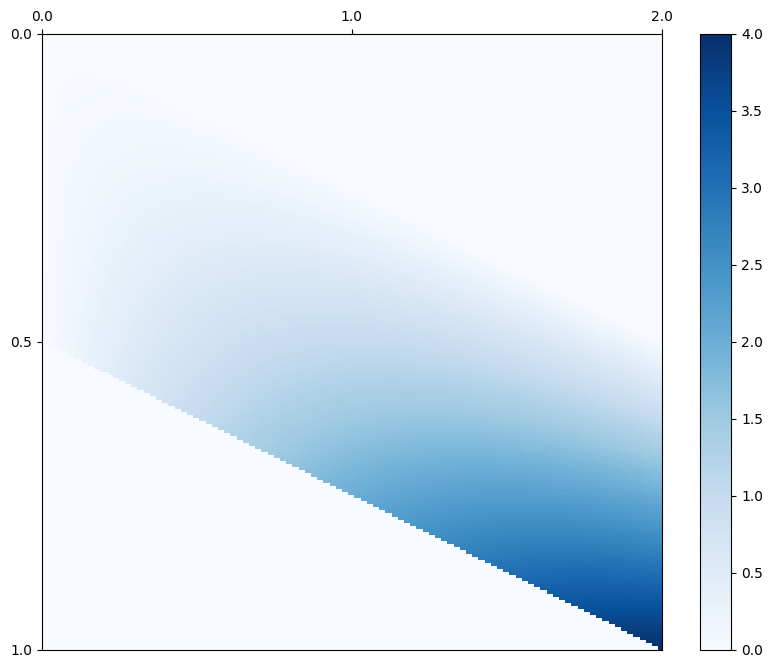

[그림 7-5] 2변량 연속형 확률분포의 히트맵


In [ ]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd, cmap='Blues')
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)

plt.show()
print('[그림 7-5] 2변량 연속형 확률분포의 히트맵')

- $f(x,y)≥0$&nbsp;&nbsp;:&nbsp;&nbsp;그림 7-5

- $\int_{-∞}^{∞}{\int_{-∞}^{∞}{f(x,y)\,dy\,dx}} = 1$&nbsp;&nbsp;:&nbsp;&nbsp; integrage.nquad()

In [ ]:
# 적분에 대한 warning을 출력하지 않게 한다.
import warnings
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

# 첫 번째 인자는 피적분함수, 두 번째 인수는 x, y의 적분구간이다.
integrate.nquad(f_xy, [[-np.inf, np.inf],
                       [-np.inf, np.inf]])[0]

1.000

##### <u>주변확률밀도함수</u>

- $(X,Y)→X$

- $f_X(x)$

$$
f_X(x) = \int_{-∞}^{∞}{f(x,y)\,dy}
\tag{7-14}
$$

- **주변확률밀도함수**(marginal probability density function) / **주변밀도함수**

- 파이썬 구현
  - integrate $→$ 다변수 함수의 1변수 적분 불가

- partial()
  - $f_X(x) →$ partial(f_xy, x)
  - $f_Y(y) →$ partial(f_xy, y=y)

- 주의 사항
  - partial(f_xy, x) &nbsp;&nbsp;&nbsp; : positional argument
  - partial(f_xy, y=y) : keyword argument

In [ ]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

- 개별적인 확률변수 취급

In [ ]:
X = [x_range, f_X]
Y = [y_range, f_Y]

각각의 밀도함수를 그려보자.

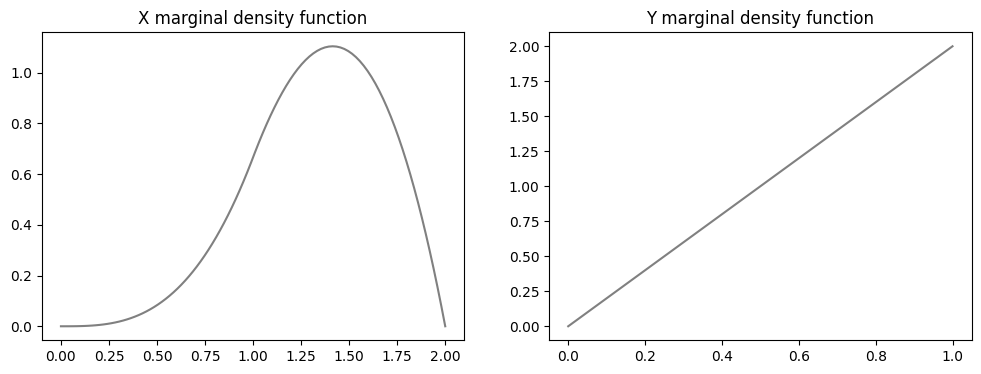

[그림 7-6] 주변밀도함수


In [ ]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X marginal density function')
ax2.set_title('Y marginal density function')

plt.show()
print('[그림 7-6] 주변밀도함수')

#### 2) 2차원 연속형 확률변수의 지표

- 기대값 / 분산 / 공분산

##### <u>기대값</u>

- $X$의기대값

$$
μ_X = E(X) = \int_{-∞}^{∞}{\int_{-∞}^{∞}{xf(x,y)\,dy\,dx}}
\tag{7-15}
$$

In [ ]:
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand, [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

1.333

- 일반화된 변환 $g(X,Y)$의 기대값

$$
E(g(X,Y)) = \int_{-∞}^{∞}{\int_{-∞}^{∞}{g(x,y)f(x,y)\,dy\,dx}}
\tag{7-16}
$$

- 기대값 함수 구현
  - 인자 $g$는 변환 함수

In [ ]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    return integrate.nquad(integrand, [[-np.inf, np.inf],
                                       [-np.inf, np.inf]])[0]

- $X$와 $Y$의 기대값

In [ ]:
mean_X = E(XY, lambda x, y: x)
mean_Y = E(XY, lambda x, y: y)
mean_X, mean_Y

(1.333, 0.667)

- 기대값의 선형성
  - $E(2X+3Y)\overset{?}{=}2E(X)+3E(Y)$

In [ ]:
a, b = 2, 3

In [ ]:
E(XY, lambda x, y: a*x + b*y)

4.667

In [ ]:
a*mean_X + b*mean_Y

4.667

##### <u>분산</u>

- $X$의 분산

$$
σ_X^2 = V(X) = \int_{-∞}^{∞}{\int_{-∞}^{∞}{(x-μ_X)^2f(x,y)\,dy\,dx}}
\tag{7-17}
$$

In [ ]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand, [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

0.111

- 일반화된 변환 $g(X,Y)$의 분산

$$
V(g(X,Y)) = \int_{-∞}^{∞}{\int_{-∞}^{∞}{(g(x,y)-E(g(X,Y)))^2f(x,y)\,dy\,dx}}
\tag{7-18}
$$

- 분산 함수 구현
  - 인자 $g$는 변환 함수

In [ ]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)
    return integrate.nquad(integrand, [[-np.inf, np.inf],
                                       [-np.inf, np.inf]])[0]

- $X$와 $Y$의 분산

In [ ]:
var_X = V(XY, lambda x, y: x)
var_Y = V(XY, lambda x, y: y)
var_X, var_Y

(0.111, 0.056)

##### <u>공분산</u>

- 공분산

$$
σ_{XY} = Cov(X,Y) = \int_{-∞}^{∞}{\int_{-∞}^{∞}{(x-μ_X)(y-μ_Y)f(x,y)\,dy\,dx}}
\tag{7-19}
$$

In [ ]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x - mean_X) * (y - mean_Y) * f_xy(x, y)
    return integrate.nquad(integrand, [[-np.inf, np.inf],
                                       [-np.inf, np.inf]])[0]

In [ ]:
cov_XY = Cov(XY)
cov_XY

0.056

- 이산형과 동일
  - $V(2X+3Y)=4V(X)+9V(Y)+12Cov(X,Y)$

In [ ]:
V(XY, lambda x, y: a*x + b*y)

1.611

In [ ]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_XY

1.611

##### <u>상관계수</u>

- 이산형과 동일

In [ ]:
cov_XY / np.sqrt(var_X * var_Y)

0.7071117041227913